In [1]:
import pandas as pd
import datetime
from datetime import timedelta
from datetime import datetime

import calendar

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
df_orig=pd.read_excel("allapptslinac2010-2020.xlsx")
df_orig.head()

,MRN,TxUnit,ApptStatus,Duration,ApptDate,ApptTime_o,ApptTime_i,ApptTime
0,99.0,WV16,NaN,30.0,2019-08-13,14:50:00,14:50:00,14:50:00
1,2918.0,SA04,C,15.0,2015-12-28,19:15:00,19:15:00,19:15:00
2,2918.0,WA15,FC,15.0,2015-12-29,14:20:00,14:20:00,14:20:00
3,5723.0,NA10,"SC,S",30.0,2013-08-07,11:10:00,11:10:00,11:10:00
4,5723.0,NA10,C,15.0,2013-08-08,8:45,08:45:00,08:45:00


In [3]:
df_orig.shape

(561578, 8)

In [4]:
df = df_orig.dropna(subset=['TxUnit'])

In [5]:
df.shape

(561572, 8)

In [6]:
group_df = df.groupby(['TxUnit','ApptDate'])['Duration'].sum().reset_index()
group_df.head()

,TxUnit,ApptDate,Duration
0,EA05,2013-11-18,445.0
1,EA05,2013-11-19,260.0
2,EA05,2013-11-20,475.0
3,EA05,2013-11-21,385.0
4,EA05,2013-11-22,460.0


In [7]:
group_df['year']=pd.to_datetime(group_df['ApptDate']).dt.year
group_df['month']=pd.to_datetime(group_df['ApptDate']).dt.month
group_df.head()

,TxUnit,ApptDate,Duration,year,month
0,EA05,2013-11-18,445.0,2013,11
1,EA05,2013-11-19,260.0,2013,11
2,EA05,2013-11-20,475.0,2013,11
3,EA05,2013-11-21,385.0,2013,11
4,EA05,2013-11-22,460.0,2013,11


In [8]:
grpdf = group_df.groupby(['TxUnit','year','month'])['Duration'].sum().reset_index()
grpdf['date']=grpdf['year'].astype(str) + grpdf['month'].astype(str).str.zfill(2)
grpdf['Date'] = pd.to_datetime(grpdf['date'], format='%Y%m')

grpdf.head() # sum duration

,TxUnit,year,month,Duration,date,Date
0,EA05,2013,11,4180.0,201311,2013-11-01
1,EA05,2013,12,12305.0,201312,2013-12-01
2,EA05,2014,1,14075.0,201401,2014-01-01
3,EA05,2014,2,12190.0,201402,2014-02-01
4,EA05,2014,3,13110.0,201403,2014-03-01


In [9]:
'''grpdfavg = group_df.groupby(['TxUnit','year','month'])['Duration'].mean().reset_index()
grpdfavg['monthlyavgHours']=grpdfavg['Duration']/60
grpdfavg['MonthlyAvgUtil']=grpdfavg['monthlyavgHours']/10
grpdfavg.head()'''

"grpdfavg = group_df.groupby(['TxUnit','year','month'])['Duration'].mean().reset_index()\ngrpdfavg['monthlyavgHours']=grpdfavg['Duration']/60\ngrpdfavg['MonthlyAvgUtil']=grpdfavg['monthlyavgHours']/10\ngrpdfavg.head()"

In [10]:
'''grpdfavg.to_excel('linac_monthly_utilization.xlsx')'''

"grpdfavg.to_excel('linac_monthly_utilization.xlsx')"

In [11]:
grpdf['monthlyTotalHours']=grpdf['Duration']/60
grpdf.head()

,TxUnit,year,month,Duration,date,Date,monthlyTotalHours
0,EA05,2013,11,4180.0,201311,2013-11-01,69.666667
1,EA05,2013,12,12305.0,201312,2013-12-01,205.083333
2,EA05,2014,1,14075.0,201401,2014-01-01,234.583333
3,EA05,2014,2,12190.0,201402,2014-02-01,203.166667
4,EA05,2014,3,13110.0,201403,2014-03-01,218.500000


In [12]:
df_monthly_sum = grpdf.groupby(['Date'])['Duration'].sum().reset_index()
#grpdf2['date']=grpdf2['year'].astype(str) + grpdf2['month'].astype(str).str.zfill(2)
#grpdf2['Date'] = pd.to_datetime(grpdf2['date'], format='%Y%m')

grpdf2.head()


NameError: name 'grpdf2' is not defined

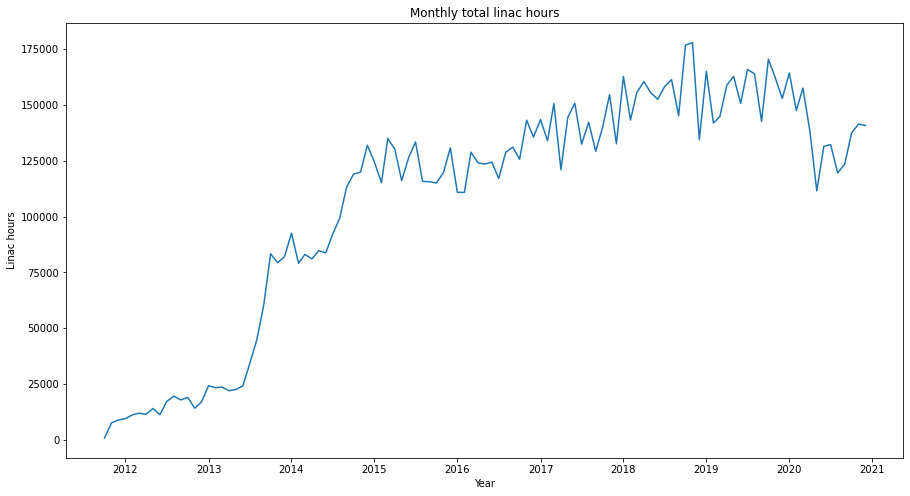

In [13]:
x=df_monthly_sum['Date']
y=df_monthly_sum['Duration']
plt.figure(figsize=[15,8])
plt.plot(x,y)
plt.title("Monthly total linac hours")
plt.xlabel("Year")
plt.ylabel("Linac hours");

In [14]:
# count the number of working units in each month
all_months = df_monthly_sum['Date'].unique()
list_units_count = []
for m in all_months:
    df_temp = grpdf[grpdf['Date']== m]
    units_count=len(df_temp)
    list_units_count.append(units_count)
    

In [ ]:
list_days_count = []
for m in all_months:
    


In [15]:
df_units_count = pd.DataFrame(all_months, columns=['Date'])
df_units_count['numberOfUnits']=list_units_count

df_units_count.head()


,Date,numberOfUnits
0,2011-10-01,1
1,2011-11-01,1
2,2011-12-01,1
3,2012-01-01,1
4,2012-02-01,1


In [18]:
#df_units_count.to_excel('num_units_each_month.xlsx')

In [16]:
# merge total hours and number of units each month
df_util = pd.merge(df_monthly_sum, df_units_count, on='Date')
df_util.head()

,Date,Duration,numberOfUnits
0,2011-10-01,785.0,1
1,2011-11-01,7600.0,1
2,2011-12-01,8850.0,1
3,2012-01-01,9470.0,1
4,2012-02-01,11165.0,1


In [18]:
df_util['/day/unit'] = df_util['Duration']/df_util['numberOfUnits']/20

In [19]:
df_util[(df_util['Date']>='2013-01-01')&(df_util['Date']<='2016-12-01')]


,Date,Duration,numberOfUnits,/day/unit
15,2013-01-01,24195.0,2,604.875000
16,2013-02-01,23330.0,2,583.250000
17,2013-03-01,23625.0,2,590.625000
18,2013-04-01,21985.0,2,549.625000
19,2013-05-01,22485.0,2,562.125000
20,2013-06-01,24145.0,2,603.625000
21,2013-07-01,34055.0,4,425.687500
22,2013-08-01,44610.0,5,446.100000
23,2013-09-01,60425.0,6,503.541667
24,2013-10-01,83320.0,6,694.333333


In [20]:
df_util[(df_util['Date']>='2017-01-01')&(df_util['Date']<='2018-12-01')]


,Date,Duration,numberOfUnits,/day/unit
63,2017-01-01,143426.0,12,597.608333
64,2017-02-01,133945.0,12,558.104167
65,2017-03-01,150590.0,12,627.458333
66,2017-04-01,121000.0,11,550.000000
67,2017-05-01,144350.0,11,656.136364
68,2017-06-01,150725.0,12,628.020833
69,2017-07-01,132415.0,12,551.729167
70,2017-08-01,142230.0,13,547.038462
71,2017-09-01,129235.0,13,497.057692
72,2017-10-01,139815.0,13,537.750000


In [21]:
df_util[(df_util['Date']>='2019-01-01')&(df_util['Date']<='2020-12-01')]


,Date,Duration,numberOfUnits,/day/unit
87,2019-01-01,165055.0,14,589.482143
88,2019-02-01,141900.0,15,473.000000
89,2019-03-01,144673.0,15,482.243333
90,2019-04-01,158815.0,15,529.383333
91,2019-05-01,162765.0,15,542.550000
92,2019-06-01,150670.0,15,502.233333
93,2019-07-01,165875.0,15,552.916667
94,2019-08-01,163935.0,15,546.450000
95,2019-09-01,142575.0,16,445.546875
96,2019-10-01,170475.0,16,532.734375


In [22]:
df_util.to_excel('machine_numbers_&_minutes.xlsx')

In [24]:
df_util['Util'] = df_util['Duration']/(df_util['numberOfUnits']*20*620) # 20 days per month, 600 mins per day


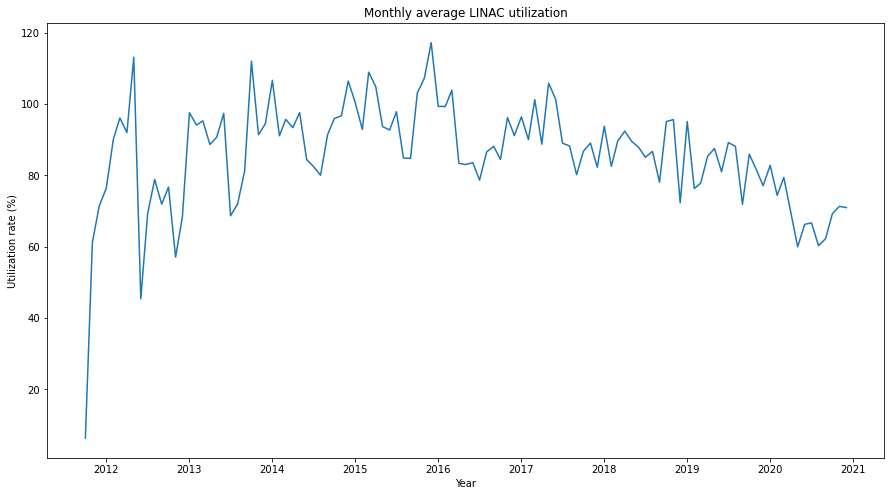

In [34]:
df_plot = df_util[df_util['Date'].dt.year >= 2010]
x=df_plot['Date']
y=df_plot['Util']*100
plt.figure(figsize=[15,8])
plt.plot(x,y)
plt.title("Monthly average LINAC utilization")
plt.xlabel("Year")
plt.ylabel("Utilization rate (%)");


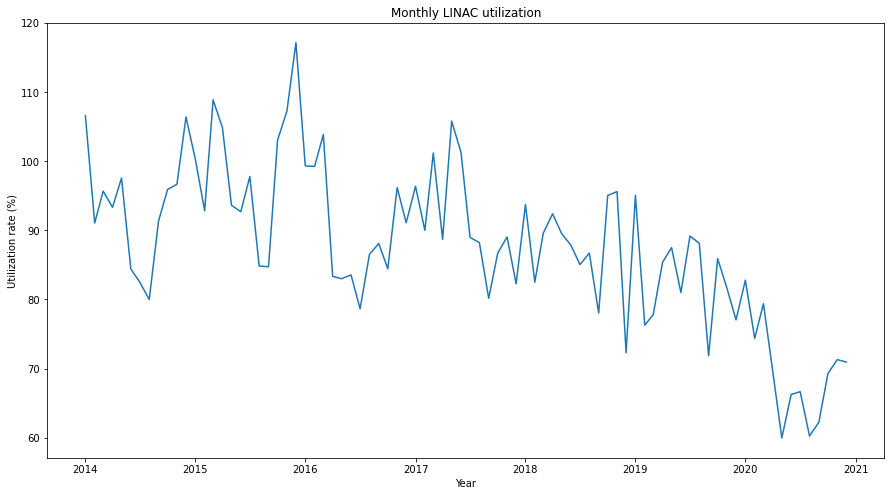

In [37]:
df_plot = df_util[df_util['Date'].dt.year >= 2014]

x=df_plot['Date']
y=df_plot['Util']*100
plt.figure(figsize=[15,8])
plt.plot(x,y)
plt.title("Monthly LINAC utilization")
plt.xlabel("Year")
plt.ylabel("Utilization rate (%)");


In [100]:
df_util[(df_util['Date'].dt.year >= 2018)&(df_util['Date'].dt.year <= 2020)]['Util'].mean()


0.8261457382605821

In [26]:
#grpdf['date']=grpdf['year'].astype(str) + grpdf['month'].astype(str).str.zfill(2)
#grpdf['Date'] = pd.to_datetime(grpdf['date'], format='%Y%m')
grpdf.head()

,TxUnit,year,month,Duration,date,Date,monthlyTotalHours
0,EA05,2013,11,4180.0,201311,2013-11-01,69.666667
1,EA05,2013,12,12305.0,201312,2013-12-01,205.083333
2,EA05,2014,1,14075.0,201401,2014-01-01,234.583333
3,EA05,2014,2,12190.0,201402,2014-02-01,203.166667
4,EA05,2014,3,13110.0,201403,2014-03-01,218.500000


In [27]:
'''grpdf['dateInt']= grpdf['year'].astype(str) + grpdf['month'].astype(str).str.zfill(2)
grpdf['YearMonth'] = pd.to_datetime(grpdf['dateInt'], format='%Y%m')

grpdf.set_index('YearMonth', inplace=True)
grpdf_5 = grpdf[grpdf['TxUnit']=='EA05']
grpdf_5.head()'''

"grpdf['dateInt']= grpdf['year'].astype(str) + grpdf['month'].astype(str).str.zfill(2)\ngrpdf['YearMonth'] = pd.to_datetime(grpdf['dateInt'], format='%Y%m')\n\ngrpdf.set_index('YearMonth', inplace=True)\ngrpdf_5 = grpdf[grpdf['TxUnit']=='EA05']\ngrpdf_5.head()"

In [28]:
units = grpdf['TxUnit'].unique()

Text(0.5, 1.0, 'Monthly Average Linac Hours')

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)


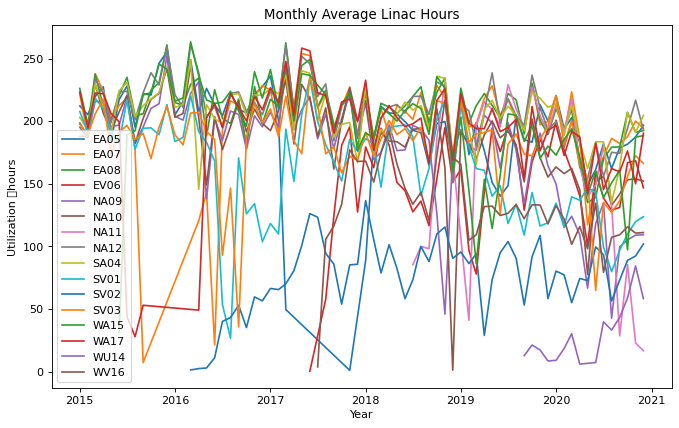

In [29]:
figure(figsize=(10, 6), dpi=80)
for i in units:
    dfplot = grpdf[grpdf['TxUnit']==i]
    dfplot = dfplot[dfplot['year']>=2015]
    y = dfplot['monthlyTotalHours']
    x = dfplot['Date']
    plt.plot(x, y, label = i)
    #dfplot['monthlyTotalHours'].plot(figsize=(15,8), linewidth=1, fontsize=10)

plt.legend(loc='lower left')
plt.xlabel('Year')
plt.ylabel('Utilization （hours')
plt.title('Monthly Average Linac Hours')

In [30]:
grpdf['AvgUtil'] = grpdf['monthlyTotalHours']/(10*20) # 20 days per month, 10 hours per day
#grpdf.to_excel("")

In [31]:
#grpdfavg['date']=grpdfavg['year'].astype(str) + grpdfavg['month'].astype(str).str.zfill(2)
#grpdfavg['Date'] = pd.to_datetime(grpdfavg['date'], format='%Y%m')
#grpdfavg.head()

In [32]:
def plotUtilization(unit, df):
    unitdf = df[df['TxUnit']==unit]
    y = unitdf['AvgUtil']
    x = unitdf['Date']
    return x,y

Text(0.5, 1.0, 'Monthly Average Linac Utilization')

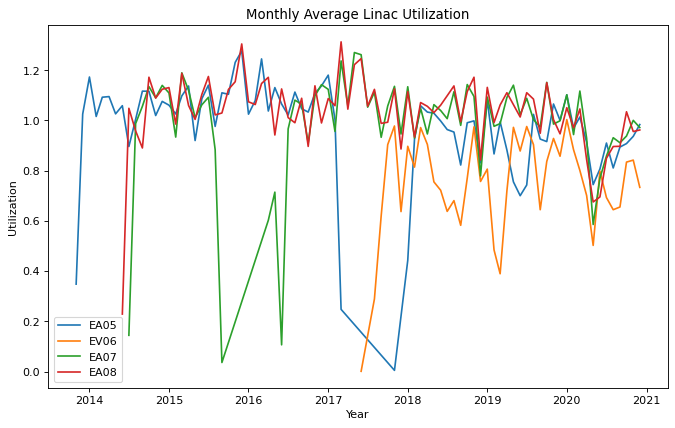

In [83]:
figure(figsize=(10, 6), dpi=80)

x5,y5 = plotUtilization('EA05', grpdf)
plt.plot(x5,y5, label = 'EA05')

x6,y6 = plotUtilization('EV06', grpdf)
plt.plot(x6,y6, label = 'EV06')

x6,y6 = plotUtilization('EA07', grpdf)
plt.plot(x6,y6, label = 'EA07')

x6,y6 = plotUtilization('EA08', grpdf)
plt.plot(x6,y6, label = 'EA08')

plt.legend(loc='lower left')
plt.xlabel('Year')
plt.ylabel('Utilization')
plt.title('Monthly Average Linac Utilization')

Text(0.5, 1.0, 'Monthly Average Linac Utilization')

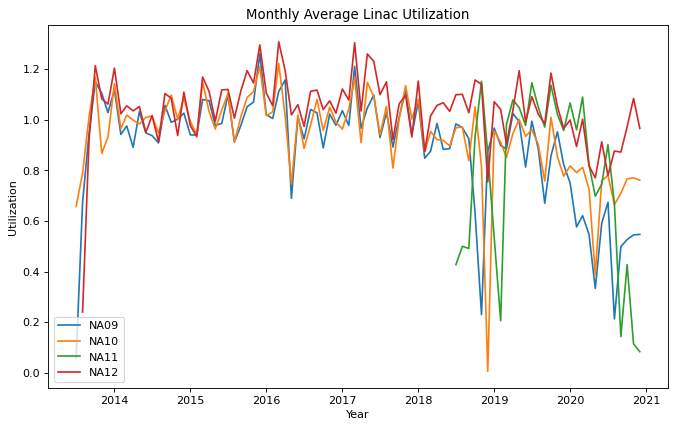

In [84]:
# 'NA09', 'NA10', 'NA11', 'NA12'
figure(figsize=(10, 6), dpi=80)

x5,y5 = plotUtilization('NA09', grpdf)
plt.plot(x5,y5, label = 'NA09')

x6,y6 = plotUtilization('NA10', grpdf)
plt.plot(x6,y6, label = 'NA10')

x6,y6 = plotUtilization('NA11', grpdf)
plt.plot(x6,y6, label = 'NA11')

x6,y6 = plotUtilization('NA12', grpdf)
plt.plot(x6,y6, label = 'NA12')

plt.legend(loc='lower left')
plt.xlabel('Year')
plt.ylabel('Utilization')
plt.title('Monthly Average Linac Utilization')

Text(0.5, 1.0, 'Monthly Average Linac Utilization')

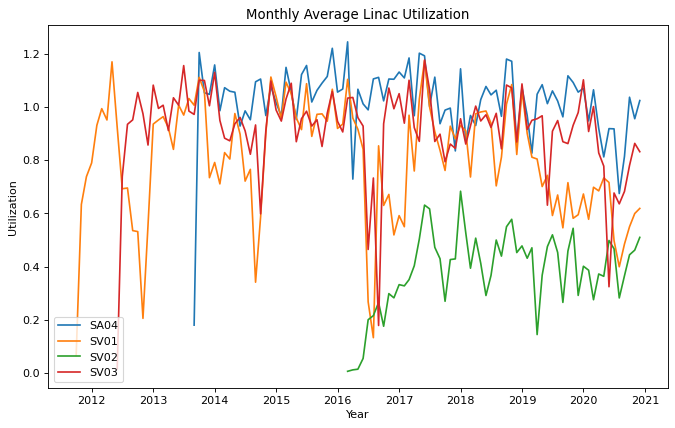

In [85]:
# 'SA04', 'SV01', 'SV02', 'SV03', 
figure(figsize=(10, 6), dpi=80)

x5,y5 = plotUtilization('SA04', grpdf)
plt.plot(x5,y5, label = 'SA04')

x6,y6 = plotUtilization('SV01', grpdf)
plt.plot(x6,y6, label = 'SV01')

x6,y6 = plotUtilization('SV02', grpdf)
plt.plot(x6,y6, label = 'SV02')

x6,y6 = plotUtilization('SV03', grpdf)
plt.plot(x6,y6, label = 'SV03')

plt.legend(loc='lower left')
plt.xlabel('Year')
plt.ylabel('Utilization')
plt.title('Monthly Average Linac Utilization')

Text(0.5, 1.0, 'Monthly Average Linac Utilization')

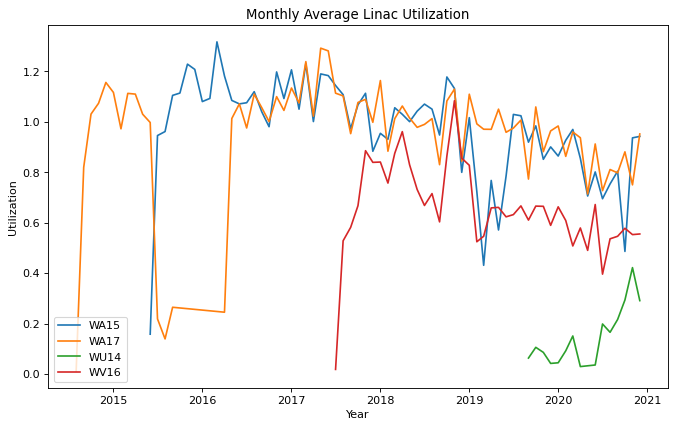

In [86]:
# 'WA15', 'WA17', 'WU14', 'WV16'
figure(figsize=(10, 6), dpi=80)

x5,y5 = plotUtilization('WA15', grpdf)
plt.plot(x5,y5, label = 'WA15')

x6,y6 = plotUtilization('WA17', grpdf)
plt.plot(x6,y6, label = 'WA17')

x6,y6 = plotUtilization('WU14', grpdf)
plt.plot(x6,y6, label = 'WU14')

x6,y6 = plotUtilization('WV16', grpdf)
plt.plot(x6,y6, label = 'WV16')

plt.legend(loc='lower left')
plt.xlabel('Year')
plt.ylabel('Utilization')
plt.title('Monthly Average Linac Utilization')

### Create Real case util

In [ ]:
df_master = pd.read_excel('master_file_final.xlsx')


In [105]:
df_19 = df[(df['ApptDate']>='2019-12-01')&(df['ApptDate']<'2021-03-01')]
#all appts

df_master_19 = df_master[(df_master['CreatedDate']>='2019-12-01')&(df_master['CreatedDate']<'2021-03-01')]
# master

In [115]:
df_master_19.shape

(5421, 88)

In [112]:
df_cate = df_master_19[['MRN','Category_x','CreatedDate']]
df_cate = df_cate[(df_cate['Category_x']!='Emergency 1')&(df_cate['Category_x']!='Planned Delay 3')]
df_cate # Urgent 2 and STD 3 patients


,MRN,Category_x,CreatedDate
13,12169,Standard 3,2020-08-25
25,22300,Standard 3,2020-08-04
56,48245,Urgent 2,2020-01-30
57,48245,Urgent 2,2020-03-03
66,60205,Standard 3,2020-05-13
...,...,...,...
57728,6238191,Standard 3,2020-05-28
57730,6242668,Standard 3,2020-08-28
57749,6337135,Standard 3,2020-03-12
57757,6366244,Standard 3,2020-03-31


In [113]:
len(df_cate['MRN'].unique())

3746

In [114]:
#df_cate = df_master_19[['MRN','Category_x','CreatedDate']]
df_ins_merged = df_19.merge(df_cate, on=['MRN'], how = 'inner')
len(df_ins_merged['MRN'].unique())
# only U2 and S3 patients


3741

In [124]:
group_19 = df_19.groupby(['TxUnit','ApptDate'])['Duration'].sum().reset_index()

group_19['year']=pd.to_datetime(group_19['ApptDate']).dt.year
group_19['month']=pd.to_datetime(group_19['ApptDate']).dt.month

df19_monthDuration = group_19.groupby(['TxUnit','year','month'])['Duration'].sum().reset_index()
df19_monthDuration['date']=df19_monthDuration['year'].astype(str) + df19_monthDuration['month'].astype(str).str.zfill(2)
df19_monthDuration['Date'] = pd.to_datetime(df19_monthDuration['date'], format='%Y%m')
df19_monthDuration['monthlyTotalHours']=df19_monthDuration['Duration']/60
df19_monthDuration['AvgUtil'] = df19_monthDuration['monthlyTotalHours']/(10*20)

ins_util_real = df19_monthDuration[(df19_monthDuration['Date']>='2019-12-01')&
                                   (df19_monthDuration['Date']<'2021-03-01')]
ins_util_real.groupby(['TxUnit'])['monthlyTotalHours'].agg('mean')

TxUnit
EA05    184.512821
EA07    185.493590
EA08    181.910256
EV06    153.067949
NA09    111.391026
NA10    146.416667
NA11    133.378205
NA12    183.166667
SA04    187.730769
SV01    120.365385
SV02     78.730769
SV03    159.730769
WA15    163.698718
WA17    173.076923
WU14     33.097222
WV16    111.935897
Name: monthlyTotalHours, dtype: float64

In [121]:
# compute utilisation for std3 and urgent 2 patients
group_19 = df_ins_merged.groupby(['TxUnit','ApptDate'])['Duration'].sum().reset_index()

group_19['year']=pd.to_datetime(group_19['ApptDate']).dt.year
group_19['month']=pd.to_datetime(group_19['ApptDate']).dt.month

df19_monthDuration = group_19.groupby(['TxUnit','year','month'])['Duration'].sum().reset_index()
df19_monthDuration['date']=df19_monthDuration['year'].astype(str) + df19_monthDuration['month'].astype(str).str.zfill(2)
df19_monthDuration['Date'] = pd.to_datetime(df19_monthDuration['date'], format='%Y%m')
df19_monthDuration['monthlyTotalHours']=df19_monthDuration['Duration']/60
df19_monthDuration['AvgUtil'] = df19_monthDuration['monthlyTotalHours']/(10*20)

ins_util_real = df19_monthDuration[(df19_monthDuration['Date']>='2020-03-01')&
                                   (df19_monthDuration['Date']<'2021-06-01')]
ins_util_real.groupby(['TxUnit'])['monthlyTotalHours'].agg('mean')


TxUnit
EA05    132.141667
EA07    135.083333
EA08    141.975000
EV06    153.646667
NA09     76.258333
NA10    129.550000
NA11     96.658333
NA12    189.200000
SA04    115.200000
SV01     69.925000
SV02     59.858333
SV03     91.475000
WA15    135.575000
WA17    150.841667
WU14     23.218750
WV16    110.741667
Name: monthlyTotalHours, dtype: float64

In [122]:
ins_util_real = df19_monthDuration[(df19_monthDuration['Date']>='2020-01-01')&
                                   (df19_monthDuration['Date']<'2020-03-01')]
ins_util_real.groupby(['TxUnit'])['AvgUtil'].agg('mean')

TxUnit
EA05    0.735208
EA07    0.542500
EA08    0.619375
EV06    0.845417
NA09    0.455833
NA10    0.630000
NA11    0.750417
NA12    1.020417
SA04    0.483542
SV01    0.237500
SV02    0.264375
SV03    0.475417
WA15    0.662917
WA17    0.763125
WU14    0.015000
WV16    0.477708
Name: AvgUtil, dtype: float64

In [82]:
ins_util_real.to_excel('RealCase_LinacUtilization.xlsx')

In [76]:
## utilisation for all patients
ins_util_allP = grpdf[(grpdf['Date']>='2020-01-01')&(grpdf['Date']<'2020-03-01')]
ins_util_allP.groupby(['TxUnit'])['AvgUtil'].agg('mean')

TxUnit
EA05    1.035625
EA07    1.022917
EA08    1.010833
EV06    0.943333
NA09    0.662917
NA10    0.803958
NA11    1.012708
NA12    0.946042
SA04    1.008125
SV01    0.625000
SV02    0.393750
SV03    1.004167
WA15    0.895417
WA17    0.923125
WU14    0.068750
WV16    0.635833
Name: AvgUtil, dtype: float64

In [52]:
grpdf

,TxUnit,year,month,Duration,date,Date,monthlyTotalHours,AvgUtil
0,EA05,2013,11,4180.0,201311,2013-11-01,69.666667,0.348333
1,EA05,2013,12,12305.0,201312,2013-12-01,205.083333,1.025417
2,EA05,2014,1,14075.0,201401,2014-01-01,234.583333,1.172917
3,EA05,2014,2,12190.0,201402,2014-02-01,203.166667,1.015833
4,EA05,2014,3,13110.0,201403,2014-03-01,218.500000,1.092500
...,...,...,...,...,...,...,...,...
1119,WV16,2020,8,6435.0,202008,2020-08-01,107.250000,0.536250
1120,WV16,2020,9,6555.0,202009,2020-09-01,109.250000,0.546250
1121,WV16,2020,10,6935.0,202010,2020-10-01,115.583333,0.577917
1122,WV16,2020,11,6635.0,202011,2020-11-01,110.583333,0.552917
